In [ ]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sns

hindi_df = pd.read_csv('df_train_hi.csv')
hindi_df.head()


claim_span  \
0  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
1  [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
2  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
3        [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]   
4  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   

                                         text_tokens  index  
0  ['‡§≠‡§æ‡§á‡§Ø‡•ã‡§Ç' '‡§á‡§∏‡§ï‡•ã' '‡§™‡•ç‡§∞‡§∂‡§æ‡§∏‡§®' '‡§ï‡§π‡•á' ',' '‡§ï‡§ø' '‡§ï‡•Å‡§∂...    500  
1  ['‡§Æ‡•å‡§∏‡§Æ' '‡§µ‡§ø‡§≠‡§æ‡§ó' '‡§ï‡•á' '‡§Æ‡•Å‡§§‡§æ‡§¨‡§ø‡§ï' '‡§Ö‡§ó‡§≤‡•á' '24' '‡§ò‡§Ç...    501  
2  ['‡§Ø‡•ã‡§ó‡•Ä' '‡§∏‡§∞‡§ï‡§æ‡§∞' '‡§Æ‡•á' '50' '‡§≤‡§æ‡§ñ' '‡§Ö‡§ß‡§ø‡§ï' '‡§¨‡§ö‡•ç‡§ö‡•á'...    502  
3  ['@U45195860' '@U84700880' '‡§§‡•Å‡§Æ‡§≤‡•ã‡§ó' '‡§ï‡§ø‡§§‡§®‡•á' '‡§≠...    503  
4  ['‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä' '‡§ï‡§æ' '‡§è‡§ï' "'" '‡§®‡§Æ‡•Ç‡§®‡§æ' "'" '‡§â‡§§‡•ç‡§§‡§∞' '‡§™...    504

In [ ]:
data=hindi_df.copy()

In [ ]:
hindi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   claim_span   6098 non-null   object
 1   text_tokens  6098 non-null   object
 2   index        6098 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 143.0+ KB


In [ ]:
hindi_df['text_tokens'][0]

"['‡§≠‡§æ‡§á‡§Ø‡•ã‡§Ç' '‡§á‡§∏‡§ï‡•ã' '‡§™‡•ç‡§∞‡§∂‡§æ‡§∏‡§®' '‡§ï‡§π‡•á' ',' '‡§ï‡§ø' '‡§ï‡•Å‡§∂‡§æ‡§∏‡§®' '‡§ï‡§π‡•á‡§Ç' '‡§ï‡§ø' '...'\n '‡§¶‡•Å‡§∂‡§æ‡§∏‡§®' '‡§ï‡§π‡•á‡§Ç' ',' '‡§Ø‡§π' '‡§®‡§ø‡§∞‡§Ç‡§ï‡•Å‡§∂' '‡§∂‡§æ‡§∏‡§®' '‡§î‡§∞' '‡§π‡§ø‡§ü‡§≤‡§∞' '‡§∂‡§æ‡§π‡•Ä' '‡§π‡•à' '‡§Æ‡§ß‡•ç‡§Ø'\n '‡§™‡•ç‡§∞‡§¶‡•á‡§∂' '‡§∏‡§∞‡§ï‡§æ‡§∞' '‡§ï‡•Ä' '@U54973484' '@U93571983' '@U67822770' '@U18179557'\n '@U22676804' '@U14425216' '@U59069382' '#GiveMPTETjoiningOrAllowToDie'\n 'https://t.co/qgWSzBtqpU']"

In [ ]:
import re
def processText(text):
 text = text.lower()
 text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text)
 text = re.sub('@[^s]+','',text)
 text = re.sub('[s]+', ' ', text)
 text = re.sub(r'#([^s]+)', r'1', text)
 text = re.sub(r'[.!:?"\/\-]', r'', text)
 text = text.strip(''" ")
 return text
for i in range(len(hindi_df)):
  hindi_df['text_tokens'][i] = processText(hindi_df['text_tokens'][i])

Streaming output truncated to the last 5000 lines.
<ipython-input-74-d9831d444ecf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = processText(hindi_df['text_tokens'][i])
<ipython-input-74-d9831d444ecf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = processText(hindi_df['text_tokens'][i])
<ipython-input-74-d9831d444ecf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hind

In [ ]:
import re

def remove_urls(text):
    url_pattern = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
    return url_pattern.sub(r'', text)

hindi_df['text_tokens'] = hindi_df['text_tokens'].apply(remove_urls)
hindi_df['text_tokens'][0]

"['‡§≠‡§æ‡§á‡§Ø‡•ã‡§Ç' '‡§á‡§∏‡§ï‡•ã' '‡§™‡•ç‡§∞‡§∂‡§æ‡§∏‡§®' '‡§ï‡§π‡•á' ',' '‡§ï‡§ø' '‡§ï‡•Å‡§∂‡§æ‡§∏‡§®' '‡§ï‡§π‡•á‡§Ç' '‡§ï‡§ø' ''\n '‡§¶‡•Å‡§∂‡§æ‡§∏‡§®' '‡§ï‡§π‡•á‡§Ç' ',' '‡§Ø‡§π' '‡§®‡§ø‡§∞‡§Ç‡§ï‡•Å‡§∂' '‡§∂‡§æ‡§∏‡§®' '‡§î‡§∞' '‡§π‡§ø‡§ü‡§≤‡§∞' '‡§∂‡§æ‡§π‡•Ä' '‡§π‡•à' '‡§Æ‡§ß‡•ç‡§Ø'\n '‡§™‡•ç‡§∞‡§¶‡•á‡§∂' '‡§∏‡§∞‡§ï‡§æ‡§∞' '‡§ï‡•Ä' ' zbtqpu']"

In [ ]:
hindi_df['text_tokens'].tail(10)

6088    ['‡§ú‡§π‡§æ‡§Ç' '‡§®‡§æ' '‡§™‡§π‡•Å‡§Ç‡§ö‡•á' '‡§∞‡§æ‡§∂‡§®' ',' '‡§µ‡§π‡§æ‡§Ç' '‡§™‡§π‡•Å‡§Ç‡§ö...
6089    ['‡§™‡•ç‡§∞‡§∂‡§æ‡§Ç‡§§' '‡§≠‡•Ç‡§∑‡§£' '‡§™‡§∞' '‡§â‡§®‡§ï‡•á' '‡§ï‡•á‡§¨‡§ø‡§®' '‡§Æ‡•á‡§Ç' '‡§π...
6090    ['‡§Ö‡§Æ‡§ø‡§§' '‡§∂‡§æ‡§π' '9' '‡§ú‡•Ç‡§®' '‡§ï‡•ã' '‡§¨‡§ø‡§π‡§æ‡§∞' '‡§Æ‡•á‡§Ç' '‡§∞‡•à...
6091    ['‡§≠‡§æ‡§à' '‡§ú‡§æ‡§ï‡•á' '‡§π‡§ø‡§®‡•ç‡§¶‡•Ç' '‡§≠‡§æ‡§á‡§Ø‡•ã‡§Ç' '‡§ï‡•Ä' '‡§Æ‡§¶‡§¶' '‡§ï‡§∞...
6092    ['‡§≠‡§æ‡§â' '‡§∂‡•ç‡§∞‡•Ä' '‡§ï‡•á' '‡§¨‡•ç‡§≤‡•á‡§ï' '‡§ü‡§ø‡§ï‡§ø‡§ü' '‡§¨‡•á‡§ö‡§ï‡§∞' '‡§ñ‡•Å...
6093    ['vodafone' 'idea' '‡§®‡•á' '‡§™‡•á‡§∂' '‡§ï‡§ø‡§Ø‡§æ' '46' '‡§∞‡•Å‡§™...
6094    ['‡§Ø‡§π' '‡§á‡§ü‡§≤‡•Ä' '‡§ï‡§æ' '‡§´‡•ã‡§ü‡•ã' '‡§π‡•à' ',' '‡§ú‡§π‡§æ‡§Ç' '‡§ï‡•ã‡§∞‡•ã...
6095    ['‡§ú‡§¨' '‡§Ö‡§™‡§®‡•á‡§Ç' '‡§π‡•Ä' '‡§∂‡§æ‡§Æ‡§ø‡§≤' '‡§π‡•ã‡§§‡•á' '‡§π‡•à' '‡§¶‡•Å‡§∂‡•ç‡§Æ‡§®...
6096    ['6' '‡§∏‡§æ‡§≤' '‡§ú‡§ø‡§∏‡•á' '‡§ï‡•ã‡§∏‡§®‡•á' '‡§ï‡•á' '‡§¨‡§æ‡§¶' ',' '‡§ñ‡•Ç‡§¨'...
6097    ['‡§ó‡§∞‡•Ä‡§¨‡•Ä' '‡§™‡§∞' '‡§µ‡§æ‡§∞' '‡§π‡•ã‡§ó‡§æ' ',' '

In [ ]:
def count_length():
  hindi_df['word_count'] = hindi_df['text_tokens'].apply(lambda x: len(str(x).split(" ")))

count_length()
hindi_df.tail(10)

claim_span  \
6088                            [1 1 1 1 1 1 1 1 1 0 0]   
6089        [1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1]   
6090                [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]   
6091  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
6092  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
6093        [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]   
6094            [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]   
6095  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
6096  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
6097  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0...   

                                            text_tokens  index  word_count  
6088  ['‡§ú‡§π‡§æ‡§Ç' '‡§®‡§æ' '‡§™‡§π‡•Å‡§Ç‡§ö‡•á' '‡§∞‡§æ‡§∂‡§®' ',' '‡§µ‡§π‡§æ‡§Ç' '‡§™‡§π‡•Å‡§Ç‡§ö...   6588          11  
6089  ['‡§™‡•ç‡§∞‡§∂‡§æ‡§Ç‡§§' '‡§≠‡•Ç‡§∑‡§£' '‡§™‡§∞' '‡§â‡§®‡§ï‡•á' '‡§ï‡•á‡§¨‡§ø‡§®' '‡§Æ‡•á‡§Ç' '‡§π...   6589          21  
6090  ['‡§Ö‡§Æ‡§ø‡§§' '‡§∂‡§æ‡§π' '9' '‡§ú‡•Ç‡§®' '‡§ï‡•ã' '‡§¨‡§ø‡§π‡§æ‡§∞' '‡§Æ‡•á‡§Ç' '‡§∞‡•à...   6590          17  
6091  ['‡§≠‡§æ‡§à' '‡§ú‡§æ‡§ï‡•á' '‡§π‡§ø‡§®‡•ç‡§¶‡•Ç' '‡§≠‡§æ‡§á‡§Ø‡•ã‡§Ç' '‡§ï‡•Ä' '‡§Æ‡§¶‡§¶' '‡§ï‡§∞...   6591          25  
6092  ['‡§≠‡§æ‡§â' '‡§∂‡•ç‡§∞‡•Ä' '‡§ï‡•á' '‡§¨‡•ç‡§≤‡•á‡§ï' '‡§ü‡§ø‡§ï‡§ø‡§ü' '‡§¨‡•á‡§ö‡§ï‡§∞' '‡§ñ‡•Å...   6592          33  
6093  ['vodafone' 'idea' '‡§®‡•á' '‡§™‡•á‡§∂' '‡§ï‡§ø‡§Ø‡§æ' '46' '‡§∞‡•Å‡§™...   6593          22  
6094  ['‡§Ø‡§π' '‡§á‡§ü‡§≤‡•Ä' '‡§ï‡§æ' '‡§´‡•ã‡§ü‡•ã' '‡§π‡•à' ',' '‡§ú‡§π‡§æ‡§Ç' '‡§ï‡•ã‡§∞‡•ã...   6594          19  
6095  ['‡§ú‡§¨' '‡§Ö‡§™‡§®‡•á‡§Ç' '‡§π‡•Ä' '‡§∂‡§æ‡§Æ‡§ø‡§≤' '‡§π‡•ã‡§§‡•á' '‡§π‡•à' '‡§¶‡•Å‡§∂‡•ç‡§Æ‡§®...   6595          23  
6096  ['6' '‡§∏‡§æ‡§≤' '‡§ú‡§ø‡§∏‡•á' '‡§ï‡•ã‡§∏‡§®‡•á' '‡§ï‡•á' '‡§¨‡§æ‡§¶' ',' '‡§ñ‡•Ç‡§¨'...   6596          32  
6097  ['‡§ó‡§∞‡•Ä‡§¨‡•Ä' '‡§™‡§∞' '‡§µ‡§æ‡§∞' '‡§π‡•ã‡§ó‡§æ' ',' '‡§∏‡§™‡§®‡§æ' '‡§Ø‡•á' '‡§∏‡§æ...   6597          62

In [ ]:
import re
emoji_pattern = re.compile("[" u"U0001F600-U0001F64F"  u"U0001F300-U0001F5FF"   u"U0001F680-U0001F6FF"   u"U0001F1E0-U0001F1FF"
u"U00002500-U00002BEF"  u"U00002702-U000027B0" u"U00002702-U000027B0" u"U000024C2-U0001F251"
u"U0001f926-U0001f937" u"U00010000-U0010ffff" u"u2640-u2642" u"u2600-u2B55" u"u200d" u"u23cf" u"u23e9"
u"u231a" u"ufe0f"  u"u3030" "]+", flags=re.UNICODE)


In [ ]:
for i in range(len(hindi_df)):
  hindi_df['text_tokens'][i] = emoji_pattern.sub(r'', hindi_df['text_tokens'][i])


Streaming output truncated to the last 5000 lines.
<ipython-input-79-fae0f55b8d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = emoji_pattern.sub(r'', hindi_df['text_tokens'][i])
<ipython-input-79-fae0f55b8d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = emoji_pattern.sub(r'', hindi_df['text_tokens'][i])
<ipython-input-79-fae0f55b8d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [ ]:
!pip install indic-nlp-library

In [ ]:
!pip install urlextract

In [ ]:
import urlextract

def find_urls_with_urlextract(text):
  extractor = urlextract.URLExtract()
  return extractor.find_urls(text)

text = "Check out this website https://www.example.com or this one http://shorturl.at"
urls = hindi_df['text_tokens'].apply(find_urls_with_urlextract)
print(urls)

0       []
1       []
2       []
3       []
4       []
        ..
6093    []
6094    []
6095    []
6096    []
6097    []
Name: text_tokens, Length: 6098, dtype: object


In [ ]:
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
  tokens = []
  for t in indic_tokenize.trivial_tokenize(indic_string):
    tokens.append(t)
  return tokens
hindi_df['text_tokens'] =hindi_df['text_tokens'].apply(lambda x: tokenization(x))
hindi_df['text_tokens'][1:10]

1    [', ‡§Æ‡•å‡§∏‡§Æ, ', ', ‡§µ‡§ø‡§≠‡§æ‡§ó, ', ', ‡§ï‡•á, ', ', ‡§Æ‡•Å‡§§‡§æ‡§¨‡§ø‡§ï...
2    [', ‡§Ø‡•ã‡§ó‡•Ä, ', ', ‡§∏‡§∞‡§ï‡§æ‡§∞, ', ', ‡§Æ‡•á, ', ', ', ', ‡§≤...
3                                                  [']
4    [', ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä, ', ', ‡§ï‡§æ, ', ', ‡§è‡§ï, ', ', ', ‡§®‡§Æ‡•Ç‡§®‡§æ...
5    [', ‡§§‡§æ‡§π‡§ø‡§∞, ', ', ‡§π‡•Å‡§∏‡•à‡§®, ', ', ‡§ï‡•á, ', ', ‡§¨‡§ö‡•ç‡§ö‡•á,...
6                                                  [']
7    [', ‚Äò, ', ', ‡§Æ‡•ã‡§¶‡•Ä, ', ', ‡§®‡•á, ', ', ‡§Ö‡§∞‡•ç‡§•‡§µ‡•ç‡§Ø‡§µ‡§∏‡•ç‡§•...
8                                                  [']
9    [', ‡§ï‡•ã‡§∞‡•ã‡§®‡§æ, ', ', ‡§Æ‡§π‡§æ‡§Æ‡§æ‡§∞‡•Ä, ', ', ‡§≤‡•ã‡§ó‡•ã‡§Ç, ', ', ...
Name: text_tokens, dtype: object

In [ ]:
stopwords_hi = ['‡§§‡•Å‡§Æ','‡§Æ‡•á‡§∞‡•Ä','‡§Æ‡•Å‡§ù‡•á','‡§ï‡•ç‡§Ø‡•ã‡§Ç‡§ï‡§ø','‡§π‡§Æ','‡§™‡•ç‡§∞‡§§‡§ø','‡§Ö‡§¨‡§ï‡•Ä','‡§Ü‡§ó‡•á','‡§Æ‡§æ‡§®‡§®‡•Ä‡§Ø','‡§∂‡§π‡§∞','‡§¨‡§§‡§æ‡§è‡§Ç','‡§ï‡•å‡§®‡§∏‡•Ä','‡§ï‡•ç‡§≤‡§ø‡§ï','‡§ï‡§ø‡§∏‡§ï‡•Ä','‡§¨‡•ú‡•á','‡§Æ‡•à‡§Ç','and','‡§∞‡§π‡•Ä','‡§Ü‡§ú','‡§≤‡•á‡§Ç','‡§Ü‡§™‡§ï‡•á','‡§Æ‡§ø‡§≤‡§ï‡§∞','‡§∏‡§¨','‡§Æ‡•á‡§∞‡•á','‡§ú‡•Ä','‡§∂‡•ç‡§∞‡•Ä','‡§µ‡•à‡§∏‡§æ','‡§Ü‡§™‡§ï‡§æ','‡§Ö‡§Ç‡§¶‡§∞', '‡§Ö‡§§', '‡§Ö‡§™‡§®‡§æ', '‡§Ö‡§™‡§®‡•Ä', '‡§Ö‡§™‡§®‡•á', '‡§Ö‡§≠‡•Ä', '‡§Ü‡§¶‡§ø', '‡§Ü‡§™', '‡§á‡§§‡•ç‡§Ø‡§æ‡§¶‡§ø', '‡§á‡§®', '‡§á‡§®‡§ï‡§æ', '‡§á‡§®‡•ç‡§π‡•Ä‡§Ç', '‡§á‡§®‡•ç‡§π‡•á‡§Ç', '‡§á‡§®‡•ç‡§π‡•ã‡§Ç', '‡§á‡§∏', '‡§á‡§∏‡§ï‡§æ', '‡§á‡§∏‡§ï‡•Ä', '‡§á‡§∏‡§ï‡•á', '‡§á‡§∏‡§Æ‡•á‡§Ç', '‡§á‡§∏‡•Ä', '‡§á‡§∏‡•á', '‡§â‡§®', '‡§â‡§®‡§ï‡§æ', '‡§â‡§®‡§ï‡•Ä', '‡§â‡§®‡§ï‡•á', '‡§â‡§®‡§ï‡•ã', '‡§â‡§®‡•ç‡§π‡•Ä‡§Ç', '‡§â‡§®‡•ç‡§π‡•á‡§Ç', '‡§â‡§®‡•ç‡§π‡•ã‡§Ç', '‡§â‡§∏', '‡§â‡§∏‡§ï‡•á', '‡§â‡§∏‡•Ä', '‡§â‡§∏‡•á', '‡§è‡§ï', '‡§è‡§µ‡§Ç', '‡§è‡§∏', '‡§ê‡§∏‡•á', '‡§î‡§∞', '‡§ï‡§à', '‡§ï‡§∞','‡§ï‡§∞‡§§‡§æ', '‡§ï‡§∞‡§§‡•á', '‡§ï‡§∞‡§®‡§æ', '‡§ï‡§∞‡§®‡•á', '‡§ï‡§∞‡•á‡§Ç', '‡§ï‡§π‡§§‡•á', '‡§ï‡§π‡§æ', '‡§ï‡§æ', '‡§ï‡§æ‡•û‡•Ä', '‡§ï‡§ø', '‡§ï‡§ø‡§§‡§®‡§æ', '‡§ï‡§ø‡§®‡•ç‡§π‡•á‡§Ç', '‡§ï‡§ø‡§®‡•ç‡§π‡•ã‡§Ç', '‡§ï‡§ø‡§Ø‡§æ', '‡§ï‡§ø‡§∞', '‡§ï‡§ø‡§∏', '‡§ï‡§ø‡§∏‡•Ä', '‡§ï‡§ø‡§∏‡•á', '‡§ï‡•Ä', '‡§ï‡•Å‡§õ', '‡§ï‡•Å‡§≤', '‡§ï‡•á', '‡§ï‡•ã', '‡§ï‡•ã‡§à', '‡§ï‡•å‡§®', '‡§ï‡•å‡§®‡§∏‡§æ', '‡§ó‡§Ø‡§æ', '‡§ò‡§∞', '‡§ú‡§¨', '‡§ú‡§π‡§æ‡§Å', '‡§ú‡§æ', '‡§ú‡§ø‡§§‡§®‡§æ', '‡§ú‡§ø‡§®', '‡§ú‡§ø‡§®‡•ç‡§π‡•á‡§Ç', '‡§ú‡§ø‡§®‡•ç‡§π‡•ã‡§Ç', '‡§ú‡§ø‡§∏', '‡§ú‡§ø‡§∏‡•á', '‡§ú‡•Ä‡§ß‡§∞', '‡§ú‡•à‡§∏‡§æ', '‡§ú‡•à‡§∏‡•á', '‡§ú‡•ã', '‡§§‡§ï', '‡§§‡§¨', '‡§§‡§∞‡§π', '‡§§‡§ø‡§®', '‡§§‡§ø‡§®‡•ç‡§π‡•á‡§Ç', '‡§§‡§ø‡§®‡•ç‡§π‡•ã‡§Ç', '‡§§‡§ø‡§∏', '‡§§‡§ø‡§∏‡•á', '‡§§‡•ã', '‡§•‡§æ', '‡§•‡•Ä', '‡§•‡•á', '‡§¶‡§¨‡§æ‡§∞‡§æ', '‡§¶‡§ø‡§Ø‡§æ', '‡§¶‡•Å‡§∏‡§∞‡§æ', '‡§¶‡•Ç‡§∏‡§∞‡•á', '‡§¶‡•ã', '‡§¶‡•ç‡§µ‡§æ‡§∞‡§æ', '‡§®', '‡§®‡§π‡•Ä‡§Ç', '‡§®‡§æ', '‡§®‡§ø‡§π‡§æ‡§Ø‡§§', '‡§®‡•Ä‡§ö‡•á', '‡§®‡•á', '‡§™‡§∞', '‡§™‡§∞', '‡§™‡§π‡§≤‡•á', '‡§™‡•Ç‡§∞‡§æ', '‡§™‡•á', '‡§´‡§ø‡§∞', '‡§¨‡§®‡•Ä', '‡§¨‡§π‡•Ä', '‡§¨‡§π‡•Å‡§§', '‡§¨‡§æ‡§¶', '‡§¨‡§æ‡§≤‡§æ', '‡§¨‡§ø‡§≤‡§ï‡•Å‡§≤', '‡§≠‡•Ä', '‡§≠‡•Ä‡§§‡§∞', '‡§Æ‡§ó‡§∞', '‡§Æ‡§æ‡§®‡•ã', '‡§Æ‡•á', '‡§Æ‡•á‡§Ç', '‡§Ø‡§¶‡§ø', '‡§Ø‡§π', '‡§Ø‡§π‡§æ‡§Å', '‡§Ø‡§π‡•Ä', '‡§Ø‡§æ', '‡§Ø‡§ø‡§π', '‡§Ø‡•á', '‡§∞‡§ñ‡•á‡§Ç', '‡§∞‡§π‡§æ', '‡§∞‡§π‡•á', '‡§±‡•ç‡§µ‡§æ‡§∏‡§æ', '‡§≤‡§ø‡§è', '‡§≤‡§ø‡§Ø‡•á', '‡§≤‡•á‡§ï‡§ø‡§®', '‡§µ', '‡§µ‡§∞‡•ç‡§ó', '‡§µ‡§π', '‡§µ‡§π', '‡§µ‡§π‡§æ‡§Å', '‡§µ‡§π‡•Ä‡§Ç', '‡§µ‡§æ‡§≤‡•á', '‡§µ‡•Å‡§π', '‡§µ‡•á', '‡§µ‡•ö‡•à‡§∞‡§π', '‡§∏‡§Ç‡§ó', '‡§∏‡§ï‡§§‡§æ', '‡§∏‡§ï‡§§‡•á', '‡§∏‡§¨‡§∏‡•á', '‡§∏‡§≠‡•Ä', '‡§∏‡§æ‡§•', '‡§∏‡§æ‡§¨‡•Å‡§§', '‡§∏‡§æ‡§≠', '‡§∏‡§æ‡§∞‡§æ', '‡§∏‡•á', '‡§∏‡•ã', '‡§π‡•Ä', '‡§π‡•Å‡§Ü', '‡§π‡•Å‡§à', '‡§π‡•Å‡§è', '‡§π‡•à', '‡§π‡•à‡§Ç', '‡§π‡•ã', '‡§π‡•ã‡§§‡§æ', '‡§π‡•ã‡§§‡•Ä', '‡§π‡•ã‡§§‡•á', '‡§π‡•ã‡§®‡§æ', '‡§π‡•ã‡§®‡•á', '‡§Ö‡§™‡§®‡§ø', '‡§ú‡•á‡§∏‡•á', '‡§π‡•ã‡§§‡§ø', '‡§∏‡§≠‡§ø', '‡§§‡§ø‡§Ç‡§π‡•ã‡§Ç', '‡§á‡§Ç‡§π‡•ã‡§Ç', '‡§¶‡§µ‡§æ‡§∞‡§æ', '‡§á‡§∏‡§ø', '‡§ï‡§ø‡§Ç‡§π‡•á‡§Ç', '‡§•‡§ø', '‡§â‡§Ç‡§π‡•ã‡§Ç', '‡§ì‡§∞', '‡§ú‡§ø‡§Ç‡§π‡•á‡§Ç', '‡§µ‡§π‡§ø‡§Ç', '‡§Ö‡§≠‡§ø', '‡§¨‡§®‡§ø', '‡§π‡§ø', '‡§â‡§Ç‡§π‡§ø‡§Ç', '‡§â‡§Ç‡§π‡•á‡§Ç', '‡§π‡•á‡§Ç', '‡§µ‡§ó‡•á‡§∞‡§π', '‡§è‡§∏‡•á', '‡§∞‡§µ‡§æ‡§∏‡§æ', '‡§ï‡•ã‡§®', '‡§®‡§ø‡§ö‡•á', '‡§ï‡§æ‡§´‡§ø', '‡§â‡§∏‡§ø', '‡§™‡•Å‡§∞‡§æ', '‡§≠‡§ø‡§§‡§∞', '‡§π‡•á', '‡§¨‡§π‡§ø', '‡§µ‡§π‡§æ‡§Ç', '‡§ï‡•ã‡§á', '‡§Ø‡§π‡§æ‡§Ç', '‡§ú‡§ø‡§Ç‡§π‡•ã‡§Ç', '‡§§‡§ø‡§Ç‡§π‡•á‡§Ç', '‡§ï‡§ø‡§∏‡§ø', '‡§ï‡§á', '‡§Ø‡§π‡§ø', '‡§á‡§Ç‡§π‡§ø‡§Ç', '‡§ú‡§ø‡§ß‡§∞', '‡§á‡§Ç‡§π‡•á‡§Ç', '‡§Ö‡§¶‡§ø', '‡§á‡§§‡§Ø‡§æ‡§¶‡§ø', '‡§π‡•Å‡§á', '‡§ï‡•ã‡§®‡§∏‡§æ', '‡§á‡§∏‡§ï‡§ø', '‡§¶‡•Å‡§∏‡§∞‡•á', '‡§ú‡§π‡§æ‡§Ç', '‡§Ö‡§™', '‡§ï‡§ø‡§Ç‡§π‡•ã‡§Ç', '‡§â‡§®‡§ï‡§ø', '‡§≠‡§ø', '‡§µ‡§∞‡§ó', '‡§π‡•Å‡§Ö', '‡§ú‡•á‡§∏‡§æ', '‡§®‡§π‡§ø‡§Ç']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what',
                'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


In [ ]:
punctuations = ['\n', '‡•§', '/', '`', '+', '\\', '"', '?', '(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '#', '*', ';', '-', '}']


In [ ]:
to_be_removed=stopwords_hi+stopwords_en+punctuations
hindi_df['text_tokens'] = hindi_df['text_tokens'].apply(lambda x: [item for item in x if item not in to_be_removed])
hindi_df['text_tokens'][0]

['‡§≠‡§æ‡§á‡§Ø‡•ã‡§Ç',
 '‡§á‡§∏‡§ï‡•ã',
 '‡§™‡•ç‡§∞‡§∂‡§æ‡§∏‡§®',
 '‡§ï‡§π‡•á',
 '‡§ï‡•Å‡§∂‡§æ‡§∏‡§®',
 '‡§ï‡§π‡•á‡§Ç',
 '‡§¶‡•Å‡§∂‡§æ‡§∏‡§®',
 '‡§ï‡§π‡•á‡§Ç',
 '‡§®‡§ø‡§∞‡§Ç‡§ï‡•Å‡§∂',
 '‡§∂‡§æ‡§∏‡§®',
 '‡§π‡§ø‡§ü‡§≤‡§∞',
 '‡§∂‡§æ‡§π‡•Ä',
 '‡§Æ‡§ß‡•ç‡§Ø',
 '‡§™‡•ç‡§∞‡§¶‡•á‡§∂',
 '‡§∏‡§∞‡§ï‡§æ‡§∞',
 'z']

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import collections
corpus_list =[]
for i in range(len(hindi_df)):
  corpus_list +=hindi_df['text_tokens'][i]
  counter=collections.Counter(corpus_list)
print(counter)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Counter({'‡§≠‡§æ‡§∞‡§§': 525, '‡§¶‡•á‡§∂': 439, '‡§ï‡•ç‡§Ø‡§æ': 378, '‡§∏‡§∞‡§ï‡§æ‡§∞': 371, '‡§Ö‡§¨': 366, '‡§ï‡•ã‡§∞‡•ã‡§®‡§æ': 343, '‡§Æ‡•ã‡§¶‡•Ä': 307, '‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä': 246, '‡§≤‡•ã‡§ó‡•ã‡§Ç': 241, '‡§ö‡•Ä‡§®': 240, 'v': 224, 'üòÇ': 223, '‡§ó‡§à': 215, '‡§™‡•Å‡§≤‡§ø‡§∏': 207, '‡§®‡§π‡•Ä': 201, '‡§¶‡•Ä': 185, '‡§π‡•ã‡§ó‡§æ': 185, '‡§∏‡§æ‡§≤': 182, '‡§¶‡§ø‡§®': 181, '‡§™‡•ç‡§∞‡§¶‡•á‡§∂': 180, '‡§ó‡§è': 178, '‡§≤‡•ã‡§ó': 171, '‡§¨‡§æ‡§§': 165, '‡§≠‡§æ‡§∞‡§§‡•Ä‡§Ø': 164, '‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏': 161, '‡§µ‡•Ä‡§°‡§ø‡§Ø‡•ã': 157, '‡§µ‡•ã': 156, '‡§∏‡§ø‡§Ç‡§π': 152, '‡§∏‡•Å‡§∂‡§æ‡§Ç‡§§': 152, '‡§®‡§æ‡§Æ': 145, '‡§∞‡§æ‡§∑‡•ç‡§ü‡•ç‡§∞‡§™‡§§‡§ø': 134, '‡§∏‡•á‡§®‡§æ': 133, '‡§≤‡•á‡§ï‡§∞': 132, '‡§¨‡§æ‡§∞': 129, '‡§™‡•Ç‡§∞‡•ç‡§µ': 129, '‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä': 124, '‡§™‡§æ‡§ï‡§ø‡§∏‡•ç‡§§‡§æ‡§®': 123, '‡§ï‡•ç‡§Ø‡•ã‡§Ç': 119, '‡§ö‡§æ‡§π‡§ø‡§è': 118, '‡§Ö‡§ó‡§∞': 117, '‡§¶‡•á': 116, '‡§π‡§Æ‡§æ‡§∞‡•á': 116, '‡§∂‡•Å‡§∞‡•Ç': 114, '‡§¨‡§ø‡§π‡§æ‡§∞': 113, '‡§Æ‡•Å‡§Ç‡§¨‡§à': 113, '‡§∞‡§æ‡§Æ': 111,

In [ ]:

least_common= [word for word, word_count in counter.most_common()[:-50:-1]]
print(least_common)

['‡§´‡•ã‡§ü‡•ã‡§∂‡•â‡§™‡•ç‡§°', '‡§á‡§∂‡§§‡§π‡§æ‡§∞', '‡§ï‡•ã‡§∏‡§®‡•á', '‡§ú‡§æ‡§≤', '‡§Ö‡§™‡§®‡•á‡§Ç', 'wvyz', '‡§µ‡•à‡§≤‡§ø‡§°‡§ø‡§ü‡•Ä', '‡§≤‡•Å‡§ü‡§ø‡§Ø‡§®', '‡§∏‡§æ‡§Ç‡§¢‡§º', '‡§ï‡§Æ‡§æ‡§è', '‡§ü‡§ø‡§ï‡§ø‡§ü', '‡§¨‡•ç‡§≤‡•á‡§ï', '‡§≠‡§æ‡§â', '‡§ú‡§æ‡§ï‡•á', '‡§è‡§ï‡•ç‡§ü‡§ø‡§µ‡§ø‡§∏‡•ç‡§ü', '‡§ï‡•á‡§¨‡§ø‡§®', '‡§â‡§§‡§æ‡§∞‡§§‡§æ', '‡§ó‡•ç‡§≤‡§¨‡•ç‡§∏', '‡§®‡§ø‡§ï‡§æ‡§≤‡§§‡§æ', '‡§Æ‡§ö‡§§‡§æ', '‡§´‡•à‡§ï‡•ç‡§ü‡•ç‡§∞‡§ø‡§Ø‡•ã‡§Ç', '‡§á‡§≤‡•á‡§ï‡•ç‡§ü‡•ç‡§∞‡•â‡§®‡§ø‡§ï‡•ç‡§∏', '‡§ó‡§æ‡§∞‡§Æ‡•á‡§Ç‡§ü', '‡§´‡•à‡§ï‡•ç‡§ü‡•ç‡§∞‡§ø‡§Ø‡§æ‡§Ç', '‡§´‡•ç‡§∞‡•Ä‡§°‡§Æ‡•à‡§®', '‡§•‡§æ‡•Ö‡§Æ‡§∏', '‡§≠‡•ç‡§∞‡§∏‡•ç‡§ü‡§æ‡§ö‡§æ‡§∞', '‡§Ü‡§ò‡•ã‡§∑‡§ø‡§§', '‡§™‡§∞‡§ø‡§ï‡§≤‡•ç‡§™‡§®‡§æ', '‡§¨‡§æ‡§ú', '‡§∂‡§ø‡§ï‡§∏‡•ç‡§§', '‡§ú‡§¨‡§∞‡§¶‡§∏‡•ç‡§§', '‡§Æ‡•ã‡§∞‡§Ø‡§æ', '‡§¨‡§æ‡§™‡•ç‡§™‡§æ', '‡§ó‡§£‡§™‡§§‡•Ä', '‡§¨‡•ç‡§∞‡§æ‡§µ‡•ã', '‡§•‡•á‡§∞‡•á‡§™‡•Ä', '‡§´‡•ç‡§≤‡•ã', '‡§Ö‡§∏‡§æ‡§Æ‡§æ‡§®‡•ç‡§Ø', '‡§´‡•ã‡§ü‡•ã‡§ó‡•ç‡§∞‡§æ‡§´‡§∞‡•ã‡§Ç', '‡§∏‡•Å‡§∞‡§ó‡§æ', '‡§≤‡§ø‡§∏‡•ç‡§ü‡§∞‡•ç‡§∏', '‡§Æ‡§®‡•Å‡§µ‡§æ‡§¶', '

In [ ]:
for i in range(len(hindi_df)):
  hindi_df['text_tokens'][i] = [word for word in hindi_df['text_tokens'][i] if word not in least_common]

Streaming output truncated to the last 5000 lines.
<ipython-input-89-62d2f40ceb0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = [word for word in hindi_df['text_tokens'][i] if word not in least_common]
<ipython-input-89-62d2f40ceb0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = [word for word in hindi_df['text_tokens'][i] if word not in least_common]
<ipython-input-89-62d2f40ceb0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
hindi_df

claim_span  \
0     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
1     [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
2     [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
3           [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]   
4     [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
...                                                 ...   
6093        [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]   
6094            [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]   
6095  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
6096  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
6097  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0...   

                                            text_tokens  index  word_count  
0     [‡§≠‡§æ‡§á‡§Ø‡•ã‡§Ç, ‡§á‡§∏‡§ï‡•ã, ‡§™‡•ç‡§∞‡§∂‡§æ‡§∏‡§®, ‡§ï‡§π‡•á, ‡§ï‡•Å‡§∂‡§æ‡§∏‡§®, ‡§ï‡§π‡•á‡§Ç, ‡§¶‡•Å‡§∂...    500          26  
1     [‡§Æ‡•å‡§∏‡§Æ, ‡§µ‡§ø‡§≠‡§æ‡§ó, ‡§Æ‡•Å‡§§‡§æ‡§¨‡§ø‡§ï, ‡§Ö‡§ó‡§≤‡•á, ‡§ò‡§Ç‡§ü‡•á, ‡§™‡§∂‡•ç‡§ö‡§ø‡§Æ, ‡§¨‡§Ç‡§ó...    501          36  
2     [‡§Ø‡•ã‡§ó‡•Ä, ‡§∏‡§∞‡§ï‡§æ‡§∞, ‡§≤‡§æ‡§ñ, ‡§Ö‡§ß‡§ø‡§ï, ‡§¨‡§ö‡•ç‡§ö‡•á, ‡§∏‡•ç‡§ï‡•Ç‡§≤, ‡§™‡§π‡•Å‡§Ç‡§ö‡•á,...    502          40  
3                                                    []    503           1  
4     [‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä, ‡§®‡§Æ‡•Ç‡§®‡§æ, ‡§â‡§§‡•ç‡§§‡§∞, ‡§™‡•ç‡§∞‡§¶‡•á‡§∂, ‡§Ü‡§§‡§æ, ‡§ï‡§π‡§§‡§æ, ‡§ï‡•ã‡§µ‡§ø...    504          62  
...                                                 ...    ...         ...  
6093   [v, ‡§™‡•á‡§∂, ‡§∞‡•Å‡§™‡§Ø‡•á, ‡§®‡§Ø‡§æ, ‡§™‡•ç‡§≤‡§æ‡§®, ‡§¶‡§ø‡§®, ‡§Æ‡§ø‡§≤‡•á‡§Ç‡§ó‡•á, ‡§´‡§æ‡§Ø‡§¶‡•á]   6593          22  
6094  [‡§á‡§ü‡§≤‡•Ä, ‡§´‡•ã‡§ü‡•ã, ‡§ï‡•ã‡§∞‡•ã‡§®‡§æ‡§µ‡§æ‡§Ø‡§∞‡§∏, ‡§ö‡§≤‡§§‡•á, ‡§ú‡•ç‡§Ø‡§æ‡§¶‡§æ, ‡§°‡•â‡§ï‡•ç‡§ü‡§∞...   6594          19  
6095     [‡§∂‡§æ‡§Æ‡§ø‡§≤, ‡§¶‡•Å‡§∂‡•ç‡§Æ‡§®‡•ã‡§Ç, ‡§ö‡§æ‡§≤, ‡§∂‡•á‡§∞, ‡§´‡§∏, ‡§ú‡§æ‡§§‡§æ, ‡§ï‡•Å‡§§‡•ç‡§§‡•ã‡§Ç]   6595          23  
6096  [‡§∏‡§æ‡§≤, ‡§ñ‡•Ç‡§¨, ‡§¨‡•Å‡§∞‡§æ, ‡§≠‡§≤‡§æ, ‡§¨‡•ã‡§≤‡§®‡•á, ‡§â‡§®‡•ç‡§π‡•Ä, ‡§®‡§Æ‡§®, ‡§™‡§°‡§º‡•á,...   6596          32  
6097  [‡§ó‡§∞‡•Ä‡§¨‡•Ä, ‡§µ‡§æ‡§∞, ‡§π‡•ã‡§ó‡§æ, ‡§∏‡§™‡§®‡§æ, ‡§∏‡§æ‡§ï‡§æ‡§∞, ‡§π‡•ã‡§ó‡§æ, ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏...   6597          62  

[6098 rows x 4 columns]

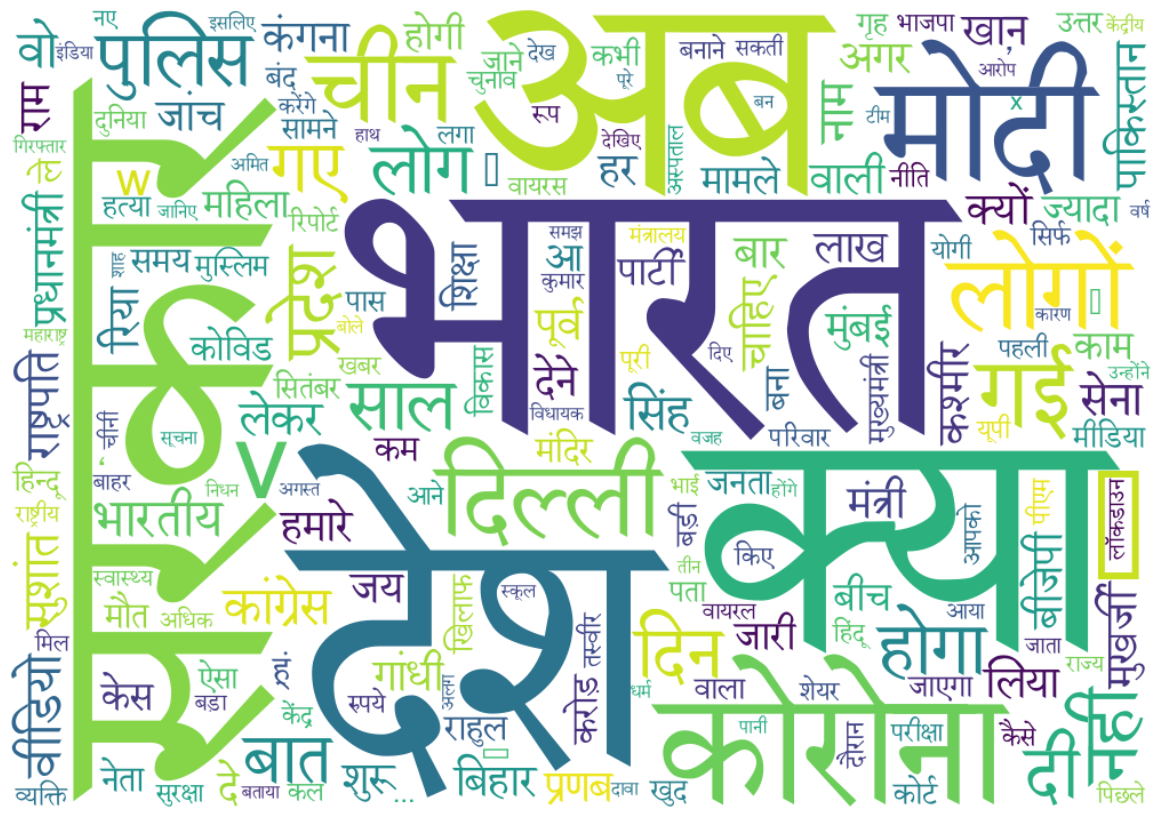

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_list = []
font='Akshar Unicode.ttf'
for i in range(len(hindi_df)):
    df_list +=hindi_df['text_tokens'][i]
dictionary=collections.Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10,font_path=font).generate_from_frequencies(dictionary)
# plot the WordCloud image
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
hindi_df

claim_span  \
0     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
1     [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
2     [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
3           [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]   
4     [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
...                                                 ...   
6093        [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]   
6094            [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]   
6095  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
6096  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
6097  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0...   

                                            text_tokens  index  word_count  
0     [‡§≠‡§æ‡§á‡§Ø‡•ã‡§Ç, ‡§á‡§∏‡§ï‡•ã, ‡§™‡•ç‡§∞‡§∂‡§æ‡§∏‡§®, ‡§ï‡§π‡•á, ‡§ï‡•Å‡§∂‡§æ‡§∏‡§®, ‡§ï‡§π‡•á‡§Ç, ‡§¶‡•Å‡§∂...    500          26  
1     [‡§Æ‡•å‡§∏‡§Æ, ‡§µ‡§ø‡§≠‡§æ‡§ó, ‡§Æ‡•Å‡§§‡§æ‡§¨‡§ø‡§ï, ‡§Ö‡§ó‡§≤‡•á, ‡§ò‡§Ç‡§ü‡•á, ‡§™‡§∂‡•ç‡§ö‡§ø‡§Æ, ‡§¨‡§Ç‡§ó...    501          36  
2     [‡§Ø‡•ã‡§ó‡•Ä, ‡§∏‡§∞‡§ï‡§æ‡§∞, ‡§≤‡§æ‡§ñ, ‡§Ö‡§ß‡§ø‡§ï, ‡§¨‡§ö‡•ç‡§ö‡•á, ‡§∏‡•ç‡§ï‡•Ç‡§≤, ‡§™‡§π‡•Å‡§Ç‡§ö‡•á,...    502          40  
3                                                    []    503           1  
4     [‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä, ‡§®‡§Æ‡•Ç‡§®‡§æ, ‡§â‡§§‡•ç‡§§‡§∞, ‡§™‡•ç‡§∞‡§¶‡•á‡§∂, ‡§Ü‡§§‡§æ, ‡§ï‡§π‡§§‡§æ, ‡§ï‡•ã‡§µ‡§ø...    504          62  
...                                                 ...    ...         ...  
6093   [v, ‡§™‡•á‡§∂, ‡§∞‡•Å‡§™‡§Ø‡•á, ‡§®‡§Ø‡§æ, ‡§™‡•ç‡§≤‡§æ‡§®, ‡§¶‡§ø‡§®, ‡§Æ‡§ø‡§≤‡•á‡§Ç‡§ó‡•á, ‡§´‡§æ‡§Ø‡§¶‡•á]   6593          22  
6094  [‡§á‡§ü‡§≤‡•Ä, ‡§´‡•ã‡§ü‡•ã, ‡§ï‡•ã‡§∞‡•ã‡§®‡§æ‡§µ‡§æ‡§Ø‡§∞‡§∏, ‡§ö‡§≤‡§§‡•á, ‡§ú‡•ç‡§Ø‡§æ‡§¶‡§æ, ‡§°‡•â‡§ï‡•ç‡§ü‡§∞...   6594          19  
6095     [‡§∂‡§æ‡§Æ‡§ø‡§≤, ‡§¶‡•Å‡§∂‡•ç‡§Æ‡§®‡•ã‡§Ç, ‡§ö‡§æ‡§≤, ‡§∂‡•á‡§∞, ‡§´‡§∏, ‡§ú‡§æ‡§§‡§æ, ‡§ï‡•Å‡§§‡•ç‡§§‡•ã‡§Ç]   6595          23  
6096  [‡§∏‡§æ‡§≤, ‡§ñ‡•Ç‡§¨, ‡§¨‡•Å‡§∞‡§æ, ‡§≠‡§≤‡§æ, ‡§¨‡•ã‡§≤‡§®‡•á, ‡§â‡§®‡•ç‡§π‡•Ä, ‡§®‡§Æ‡§®, ‡§™‡§°‡§º‡•á,...   6596          32  
6097  [‡§ó‡§∞‡•Ä‡§¨‡•Ä, ‡§µ‡§æ‡§∞, ‡§π‡•ã‡§ó‡§æ, ‡§∏‡§™‡§®‡§æ, ‡§∏‡§æ‡§ï‡§æ‡§∞, ‡§π‡•ã‡§ó‡§æ, ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏...   6597          62  

[6098 rows x 4 columns]

In [ ]:
hindi_df[hindi_df['word_count']<5]['text_tokens']

3                          []
6                          []
8                          []
11                         []
14                         []
                ...          
6054                       []
6059                       []
6078                       []
6079    [‡§ï‡•á‡§Ç‡§¶‡•ç‡§∞‡•Ä‡§Ø, ‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä, w]
6085                       []
Name: text_tokens, Length: 1433, dtype: object

In [ ]:
import pip

def get_library_info(library_name):
  try:
    package_info = pip.get_installed_distributions(local_only=True, dist='.' + library_name)
    if package_info:
      return package_info[0]
    else:
      return None
  except Exception as e:
    print(f"Error: {e}")

# Example usage
library_info = get_library_info('indicnlp')
if library_info:
  print(library_info.version)
  print(library_info.location)


Error: module 'pip' has no attribute 'get_installed_distributions'


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
from indicnlp.normalize import indic_normalize
from indicnlp.tokenize import indic_tokenize
text = "‡§®‡§Æ‡§∏‡•ç‡§§‡•á, ‡§ï‡•à‡§∏‡•á ‡§π‡•ã ‡§Ü‡§™?"

factory = indic_normalize.IndicNormalizerFactory()
normalizer = factory.get_normalizer("hi")  # "hi" for Hindi
normalized_text = normalizer.normalize(text)

tokens = indic_tokenize.trivial_tokenize(normalized_text)

print(tokens)

['‡§®‡§Æ‡§∏‡•ç‡§§‡•á', ',', '‡§ï‡•à‡§∏‡•á', '‡§π‡•ã', '‡§Ü‡§™', '?']


In [ ]:
print(normalized_text)

‡§®‡§Æ‡§∏‡•ç‡§§‡•á, ‡§ï‡•à‡§∏‡•á ‡§π‡•ã ‡§Ü‡§™?
